In [1]:
# Abrindo a conexão com o banco de dados
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
base = r"C:\Users\Bruno.Freitas\Downloads\database.db"
conn = sqlite3.connect(base)

In [3]:
# consulta dos dados no banco de dados
consulta_atividade = """
 SELECT
 *
 FROM
 flight_activity fa
 LEFT JOIN flight_loyalty_history flh
 ON (fa.loyalty_number=flh.loyalty_number)
"""
df_atividade = pd.read_sql_query(consulta_atividade,conn)

# Consulta de tabela
df_atividade


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,...,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,...,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [4]:
# Fechando conexão com o banco de dados
conn.close()

-------

Parte 2

1.4 Coletando os dados para análise:

Para executar o próximo passo do plano de solução do problema de negócio, precisamos coletar os dados do banco de dados

In [5]:
df1 = df_atividade.copy()

4.0. Preparando os dados para treinamento do algoritmo

In [6]:
# selecionando somente as colunas numéricas para o modelo
colunas = ['year', 'month', 'flights_booked',
'flights_with_companions', 'total_flights',
'distance', 'points_accumulated', 'salary',
'clv', 'loyalty_card']

df_colunas_selecionadas = df_atividade.loc[:, colunas]

# removendo linhas com alguma coluna vazia
df_treinamento = df_colunas_selecionadas.dropna()

# verificando o numero de linhas vazias
df_treinamento.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

In [7]:
# selecionando somente as colunas numéricas para o modelo
colunas_scr = ['year','month','flights_with_companions','total_flights','points_accumulated','salary','clv','loyalty_card']

df_colunas_selecionadas_scr = df_atividade.loc[:, colunas_scr]

# removendo linhas com alguma coluna vazia
df_treinamento_scr = df_colunas_selecionadas_scr.dropna()

# verificando o numero de linhas vazias
df_treinamento_scr.isna().sum()

year                       0
month                      0
flights_with_companions    0
total_flights              0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

In [8]:
# Verificando quantidade de linhas nos dados 
df_treinamento.shape[0]

302952

In [9]:
# Verificando quantidade de colunas nos dados 
df_treinamento.head()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv,loyalty_card
0,2017,1,3,0,3,1521,152.0,92552.0,7919.20,Aurora
3,2017,1,0,0,0,0,0.0,63253.0,4170.57,Star
4,2017,1,0,0,0,0,0.0,91163.0,6622.05,Star
5,2017,1,0,0,0,0,0.0,70323.0,48356.96,Nova
6,2017,1,0,0,0,0,0.0,76849.0,5143.88,Nova


Análise exploratória dos dados

In [10]:
df_treinamento.describe()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv
count,302952.000000,302952.000000,302952.000000,302952.000000,302952.000000,302952.000000,302952.000000,302952.000000,302952.000000
mean,2017.500000,6.500000,4.102188,1.027546,5.129733,1206.698319,123.510918,79268.825953,8133.139523
std,0.500001,3.452058,5.219821,2.072329,6.512395,1433.422843,146.673943,34992.133508,6962.273365
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,2119.890000
25%,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,4089.460000
50%,2017.500000,6.500000,1.000000,0.000000,1.000000,472.000000,48.000000,73479.000000,5810.630000
75%,2018.000000,9.250000,8.000000,1.000000,10.000000,2332.000000,239.000000,88612.000000,9075.770000
max,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,407228.000000,83325.380000


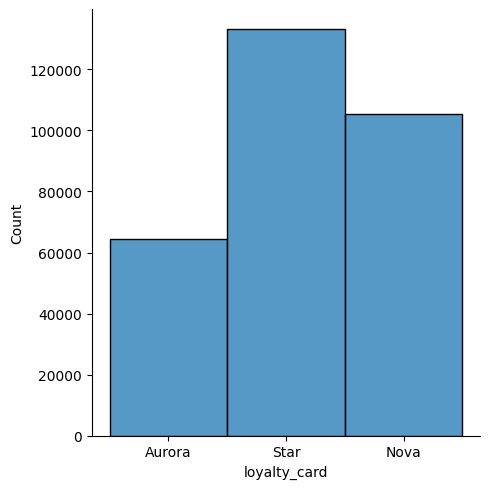

In [14]:
#Plot da densidade de distribuição do fenômeno que queremos prever
sns.displot(df_treinamento['loyalty_card'],kde=False)

Maior volume de clientes com cartão Star.

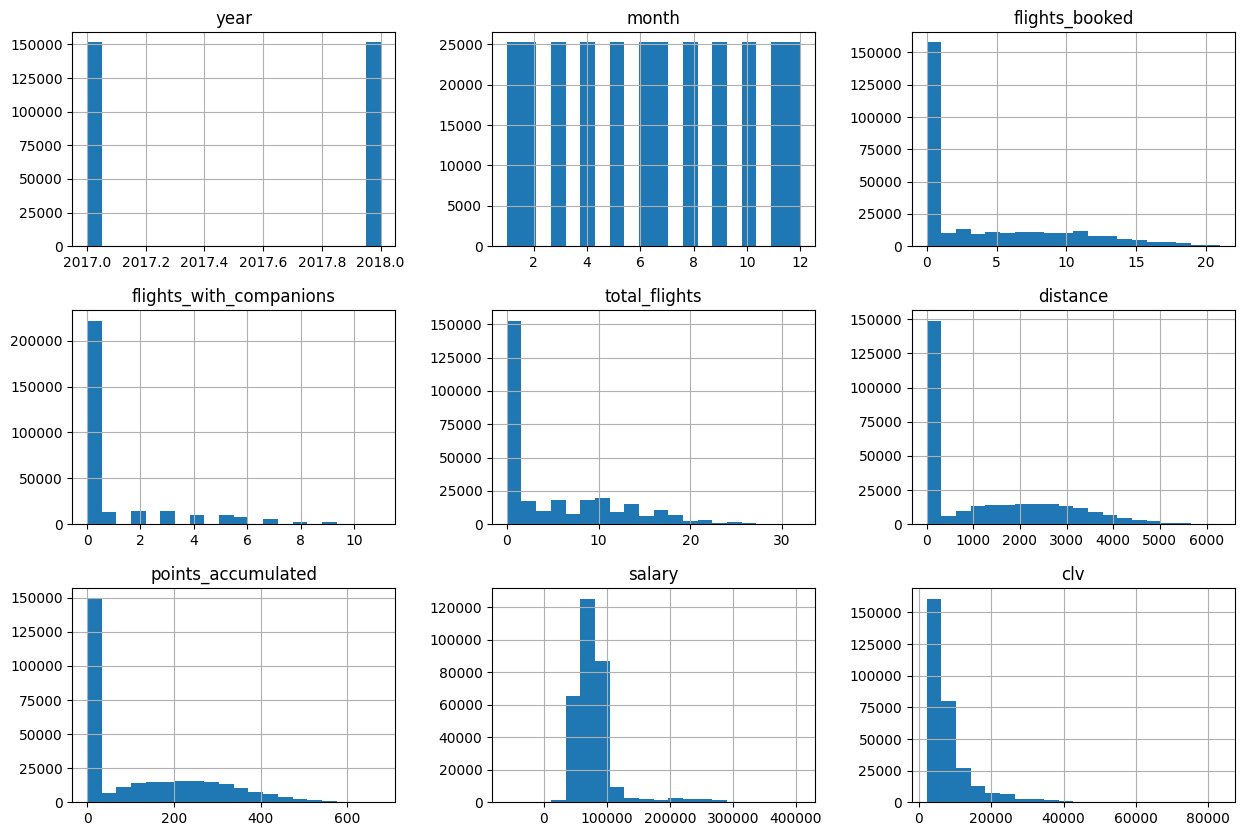

In [11]:
# Visualização da Distribuição das Variáveis
df_treinamento.hist(bins=20, figsize=(15,10))
plt.show()

Dado a forma das distribuições das variáveis, vemos que a maior parte das pessoas das pessoas fazem poucos voos, com curtas distâncias e de acordo com o seu comportamento, há poucos pontos acumulados e um baixo CLV. Ou seja, há um desempenho padrão nos dados apresentados.

In [12]:
# Correlação entre Variáveis
correlacao = df_treinamento.iloc[:,0:9].corr()
print(correlacao)

                                 year         month  flights_booked  \
year                     1.000000e+00 -8.147391e-12        0.044179   
month                   -8.147391e-12  1.000000e+00        0.082649   
flights_booked           4.417864e-02  8.264907e-02        1.000000   
flights_with_companions  2.092814e-02  6.495257e-02        0.502451   
total_flights            4.206971e-02  8.691371e-02        0.961407   
distance                 5.563614e-02  7.726976e-02        0.767238   
points_accumulated       7.493208e-02  5.481486e-02        0.759909   
salary                   1.295501e-14  1.276233e-14        0.005804   
clv                      1.101302e-13 -4.660108e-15       -0.004065   

                         flights_with_companions  total_flights  distance  \
year                                    0.020928       0.042070  0.055636   
month                                   0.064953       0.086914  0.077270   
flights_booked                          0.502451       0.9

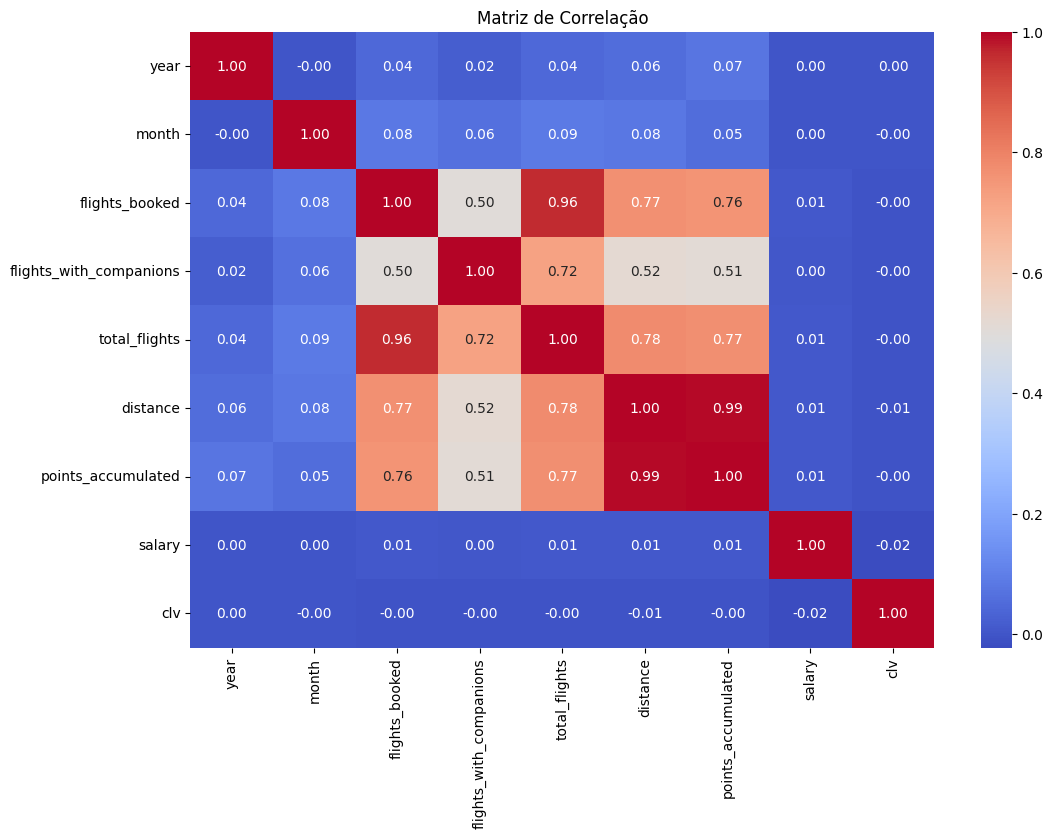

In [13]:
# Visualização da Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Treinando algoritmo - machine learning

In [ ]:
from sklearn import tree as tr
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Árvore de decisão

In [ ]:
X = df_treinamento.drop( columns=['loyalty_card'] )
y = df_treinamento.loc[:, 'loyalty_card']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Definindo o algoritmo Decision Tree
modelo = tr.DecisionTreeClassifier(max_depth=10)

In [ ]:
# Treinar o modelo no conjunto de treinamento
modelo_treinado = modelo.fit(X_train, y_train)

In [ ]:
# Fazer previsões no conjunto de teste
previsoes = modelo_treinado.predict(X_test)

In [ ]:
# Calcular a acurácia
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia do modelo:", acuracia)

### Random Forest

In [ ]:
X = df_treinamento_scr.drop( columns=['loyalty_card'] )
y = df_treinamento_scr.loc[:, 'loyalty_card']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Definir o modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
# Treinar o modelo Random Forest no conjunto de treinamento
modelo_rf_treinado = modelo_rf.fit(X_train, y_train)

In [ ]:
# Fazer previsões no conjunto de teste
previsoes_rf = modelo_rf_treinado.predict(X_test)

In [ ]:
# Calcular a acurácia do modelo Random Forest
acuracia_rf = accuracy_score(y_test, previsoes_rf)
print("Acurácia do modelo Random Forest:", acuracia_rf)

Dado o cenário que estávamos

In [ ]:
# Visualização gráfica do modelo treinado
tr.plot_tree(modelo,
             class_names=['Aurora', 'Nova', 'Star'],
             filled=True)

In [ ]:
# Demonstração do resultado da previsão do modelo
X_novo = X.sample()
previsao = modelo.predict_proba(X_novo)
print('Probabilidades de cartão para o cliente - Aurora: {:.2f}, Nova: {:.2f}, Star: {:.2f}'.format(100*previsao[0][0], 100*previsao[0][1], 100*previsao[0][2]))

In [ ]:
# Treinando o algoritmo Decision Tree
modelo_final_rf = modelo_rf.fit(X, y)

In [ ]:
# Demonstração do resultado da previsão do modelo
X_novo = X.sample()
previsao = modelo_final_rf.predict_proba(X_novo)
print('Probabilidades de cartão para o cliente - Aurora: {:.2f}, Nova: {:.2f}, Star: {:.2f}'.format(100*previsao[0][0], 100*previsao[0][1], 100*previsao[0][2]))

Painel publicado - Propensão de cliente

In [ ]:
# Testes para Slicer
X.year.min()

In [ ]:
# Testes para Slicer
X.year.max()

In [ ]:
import gradio as gr

In [ ]:
# Definindo minha previsão

# Função de recebimento dos dados 
def predict(* args):

    # Guardando em um array
    X = np.array([args]).reshape(1,-1)

    
    previsao = modelo_final_rf.predict_proba(X)
    return{"Aurora": previsao[0][0], "Nova": previsao[0][1], "Star": previsao[0][2]}




# Criando a vizualização em painél nomeado "demo"
with gr.Blocks() as demo:
    # Título do painél
    gr.Markdown('''# Propensão de Compra''')

    with gr.Row():
        with gr.Column():
            gr.Markdown('''# Dados de voo do cliente''')
            year                        = gr.Slider(label="Ano de voo", minimum=2017, maximum=2018, step=1, randomize=True)
            month                       = gr.Slider(label="Mês de voo", minimum=1, maximum=12, step=1, randomize=True)
            flights_booked              = gr.Slider(label="Voos Reservados", minimum=0, maximum=21, step=1, randomize=True)
            flights_with_companions     = gr.Slider(label="Voos Acompanhados", minimum=0, maximum=11, step=1, randomize=True)
            total_flights               = gr.Slider(label="Total de voos", minimum=0, maximum=32, step=1, randomize=True)
            distance                    = gr.Slider(label="Diastância média percorrida", minimum=0, maximum=6293, step=1, randomize=True)
            points_accumulated          = gr.Slider(label="Pontos Acumulados", minimum=0.00, maximum=676.50, step=0.1, randomize=True)
            salary                      = gr.Slider(label="Salário Anual", minimum=58486.00, maximum=407228.00, step=0.1, randomize=True)
            clv                         = gr.Slider(label="CLV", minimum=2119.89, maximum=83325.38, step=0.1, randomize=True)

            with gr.Row():
                gr.Markdown('''# Botão de previsão''')

                # Botão
                predict_btn = gr.Button(value='Previsão')

        with gr.Column():
            gr.Markdown('''# Cartão sugerido''')

            # Resposta da previsão
            resposta = gr.Label()
        

    # Botão de previsão
    predict_btn.click(
        # Modelo a ser executado
        fn=predict,
        # Entrada dos dados para previsão do modelo
        inputs=[
            year,
            month,
            flights_booked,
            flights_with_companions,
            total_flights,
            distance,
            points_accumulated,
            salary,
            clv ],
        # Retorno do modelo testado nos dados
        outputs=[resposta],
    )

demo.launch(debug=True, share=False)